In [2]:
%matplotlib inline
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rng
import math, time
rng.seed(int(time.time())) # seed the random number generator
np.set_printoptions(precision = 2, suppress = True)

In [28]:
# you can give this a 2-d vector x, and it'll return another one nearby...
def draw_from_proposal(x, jumpsize=1.0):
    covariance = jumpsize * np.eye(len(x))
    d = rng.multivariate_normal(np.zeros(x.shape), cov=covariance)
    return x + d

In [33]:
def calc_Pstar(x):
    #val = \exp\bigg( -\frac{x^2 + y^2}{40} \bigg) \cdot (\frac{|x|}{1+|y|} \;\; + x^4)$%

    val = np.exp(-np.sum(x*x/40.)) 
    val = val * np.power((np.abs(x[0])/(1. + np.abs(x[1]))),  4.0)
    #val = val * np.power(x,2.0).sum() 
    #val = val * np.exp(10.0 * math.sin(x[0] * x[1] /10.))  # + math.cos(x[1]) + 0.5)
    return val

Accepted:  24288
Rejected:  75712


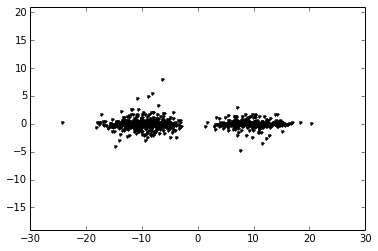

In [36]:
num_samples = 1000
proposal_typical_jump = 5.0
nAccepted, nRejected = 0, 0

x = np.array([0.0, 0.0])  # starting point (who cares...)
samples = np.zeros((num_samples, 2),float)  
for j in range(num_samples):
    for i in range(100):  #I leave 100 samples in between each one that I keep.
        x_proposal = draw_from_proposal(x, proposal_typical_jump)
        if calc_Pstar(x_proposal) > calc_Pstar(x):
            x = x_proposal
            nAccepted = nAccepted + 1
        else:
            threshold = calc_Pstar(x_proposal) / calc_Pstar(x)
            if rng.random() < threshold:
                x = x_proposal
                nAccepted = nAccepted + 1
            else:
                nRejected = nRejected + 1
    samples[j,:] = x
    #if x[1]>1: count += 1

plt.plot(samples[:,0],samples[:,1],'.k')
plt.axis('equal')
print ('Accepted: ', nAccepted)
print ('Rejected: ', nRejected)